In [1]:
import os
import sys
import numpy as np
import math
import copy
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sys.path.insert(0, '..')

In [149]:
DATAPATH ='/home/swei20/SymNormSlidingWindows/'

In [150]:
DATADIR = '/out_sport/'
FILE = 'L2_rd_csL_m8192_1014_10:48.csv'
path = os.path.join(DATADIR, FILE)

In [121]:
from util.plot import get_pd

In [151]:
os.path.join(DATAPATH, os.path.join(DATAPATH, DATADIR, FILE))

'/out_sport/L2_rd_csL_m8192_1014_10:48.csv'

In [175]:
def get_path(filename,DATADIR=DATADIR):
    return os.path.join(DATADIR, filename)
def get_pd(DATADIR, filename, mLoop=True):
    normType, ftr = filename.split('_')[0], filename.split('_')[1]
    path = get_path(filename, DATADIR)    
    out = pd.read_csv(path)
    if mLoop:
        plot_error(out, ftr, normType)  
    else:
        plot_size_error(out, ftr, normType)
    return out,ftr,normType
def plot_error(out, ftr, normType, cols=['errUn','errCs'], labels=['uniform','sketch']):
    outR = out[out['cr']==6]
    for i, col in enumerate(cols): 
        plt.scatter(np.log10(outR['m']), outR[col], label = f'{labels[i]}')
    plt.errorbar(np.log10(outR['m']), outR['errCs'], outR['std']/2.0, c='r',alpha=0.3)
        
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log stream size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')
def plot_size_error(out, ftr, normType):
    rList = out['r'].unique()
    colors = cm.get_cmap('viridis')(np.linspace(1,0,len(rList)))
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        plt.scatter(outR['cr'], outR['errCs'], color = colors[i] ,label=f'r={r}')
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log sketch size')
    if ftr =='rd':
        plt.title(f'Synthetic Stream')
    else:
        plt.title(f'CAIDA {ftr}')

In [123]:
plt.style.use(['ieee','no-latex'])

In [ ]:
 'out_sport/L2_rd_csL_m8192_1014_10:48.csv'

In [147]:
filename = '/out/trff_sport__csL_1011_01:23.csv'

In [149]:
filename.split('_')[1]

'sport'

In [156]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out_sport'
FILE = 'L2_rd_csL_m8192_1014_10:48.csv'
FILE2 = 'T8_rd_csL_m4096_1014_15:13.csv'
FILE3 = 'L2_rd_mL_1014_16:33.csv'
# path = os.path.join(DATADIR, FILE)

In [167]:
out3

,errCs,n,m,w,c,r,cr,ex,cs,std,un,errUn
0,0.04,64,512,51,16,4,6,14.387,13.753,1.159,8.37,0.72
1,0.06,64,1024,102,16,4,6,35.157,32.960,5.669,12.65,1.78
2,0.04,64,1024,102,32,4,7,35.157,36.685,2.849,12.65,1.78
3,0.01,64,2048,204,16,4,6,63.403,63.042,12.817,24.08,1.63
4,0.05,64,2048,204,32,4,7,63.403,66.641,12.447,24.08,1.63
5,0.01,64,4096,409,16,4,6,118.174,116.499,13.227,48.17,1.45
6,0.04,64,4096,409,32,4,7,118.174,112.988,26.645,48.17,1.45
7,0.08,64,8192,819,16,4,6,245.799,226.573,16.355,68.04,2.61
8,0.04,64,8192,819,32,4,7,245.799,256.031,44.751,68.04,2.61


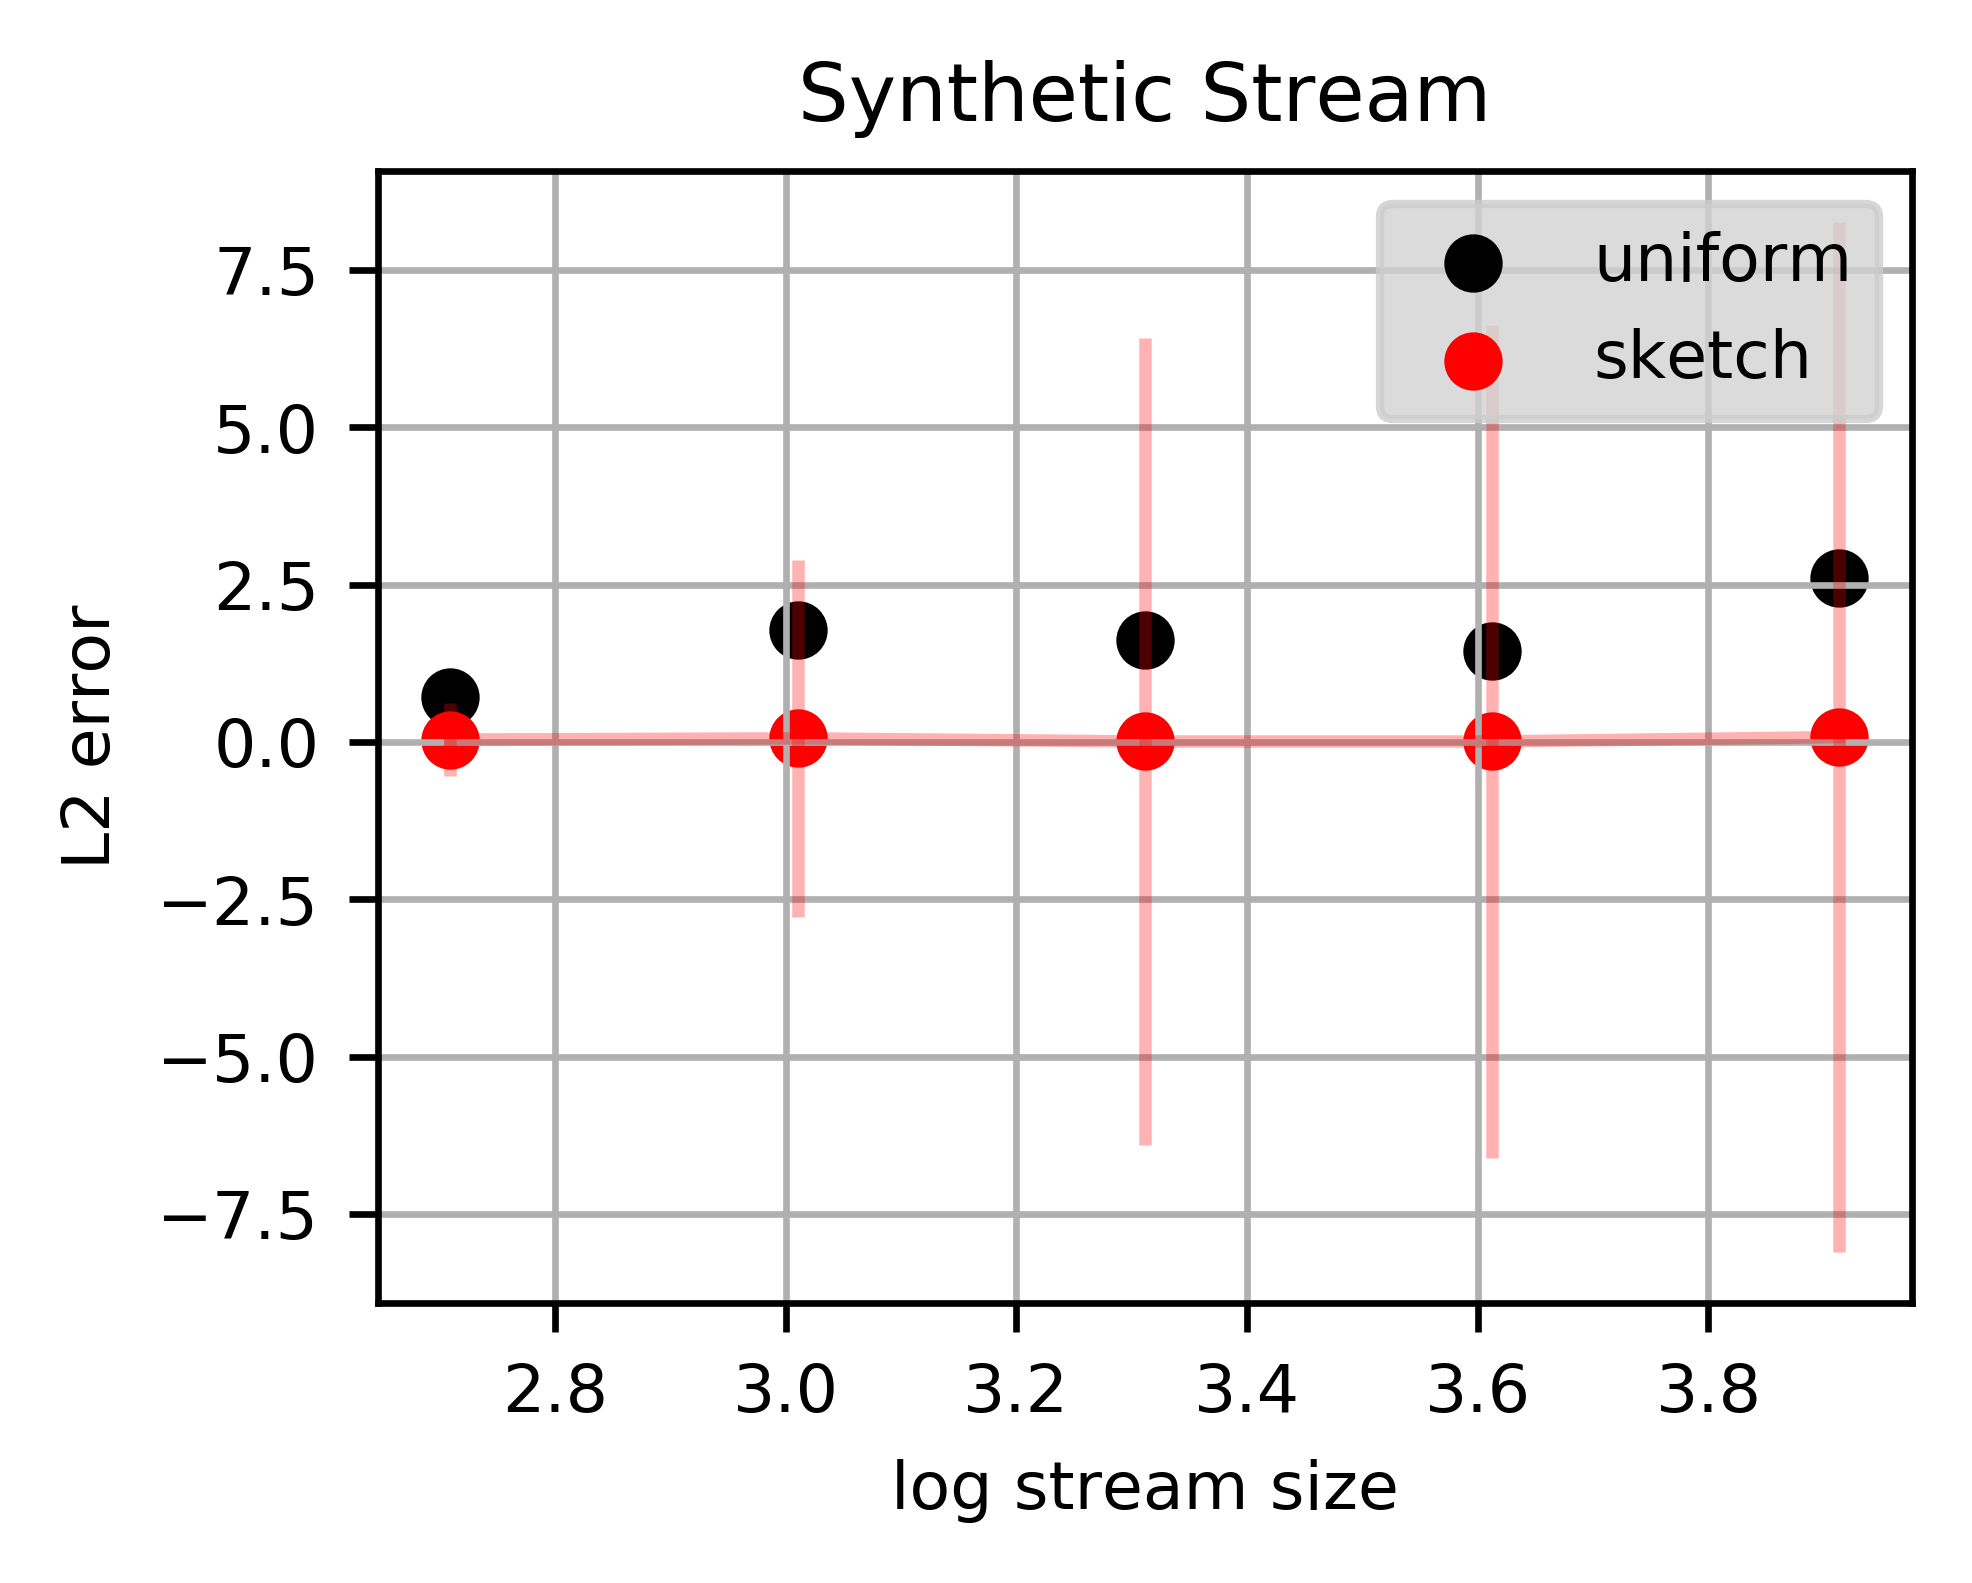

In [176]:
DATADIR = DATAPATH +'/out_rd_wRate01'
out3,ftr,normType = get_pd(DATADIR, FILE3, mLoop=True)
plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}_m_std.png')

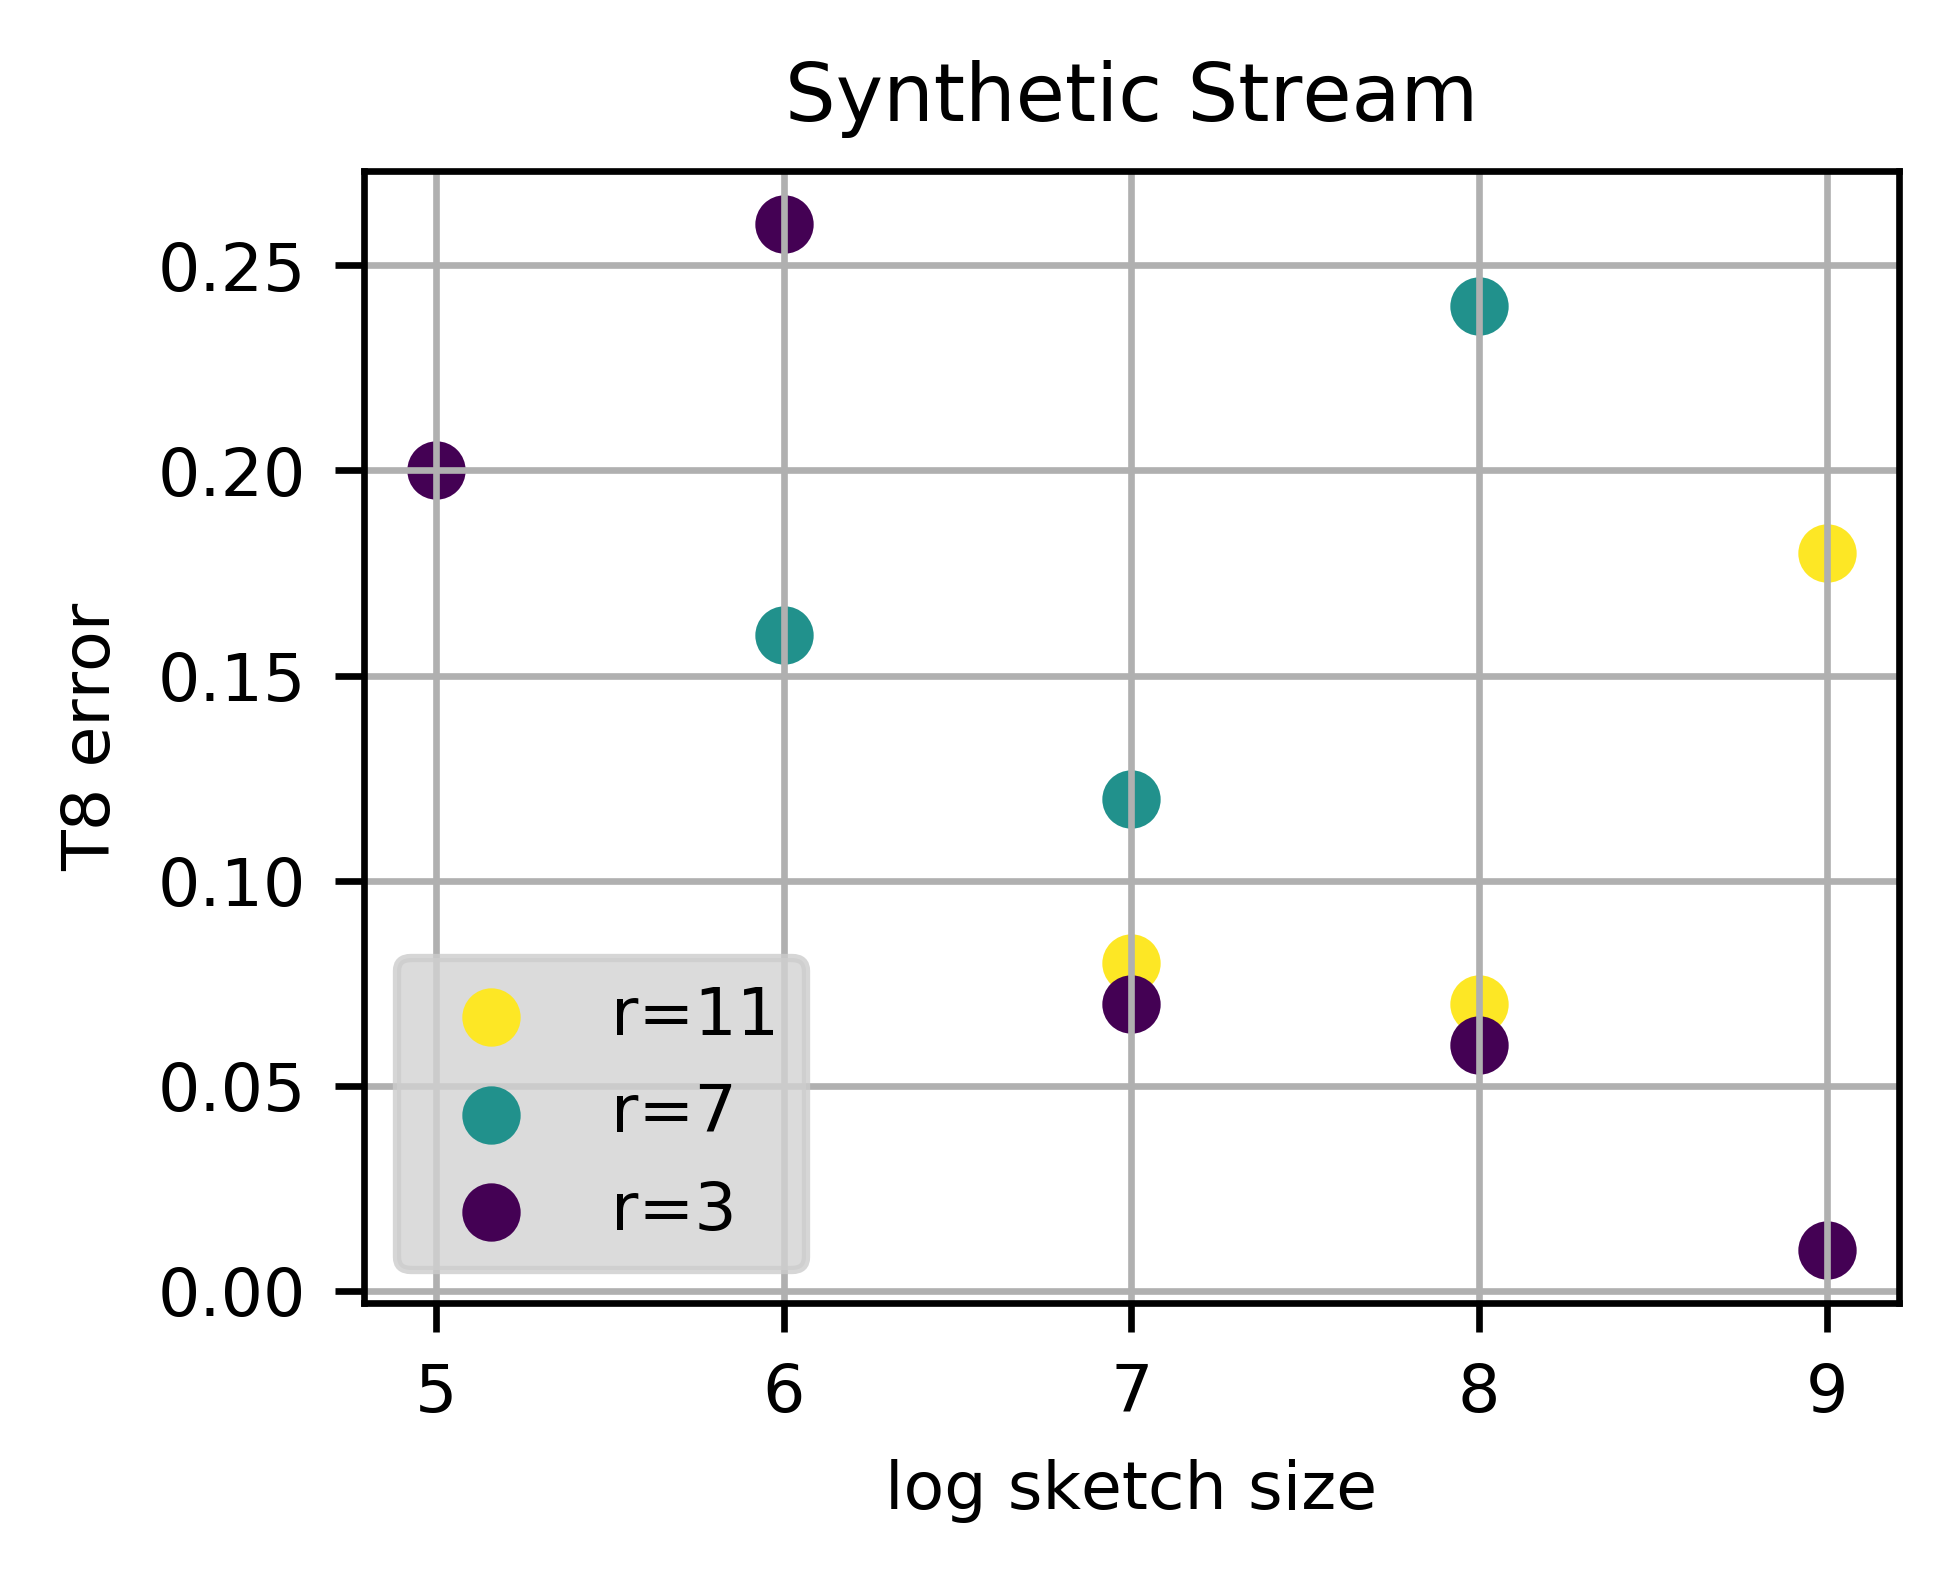

In [155]:
DATADIR = DATAPATH +'/out_rd_wRate01'
out3,ftr,normType = get_pd(DATADIR, FILE2, mLoop=False)
plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}_m.pdf')

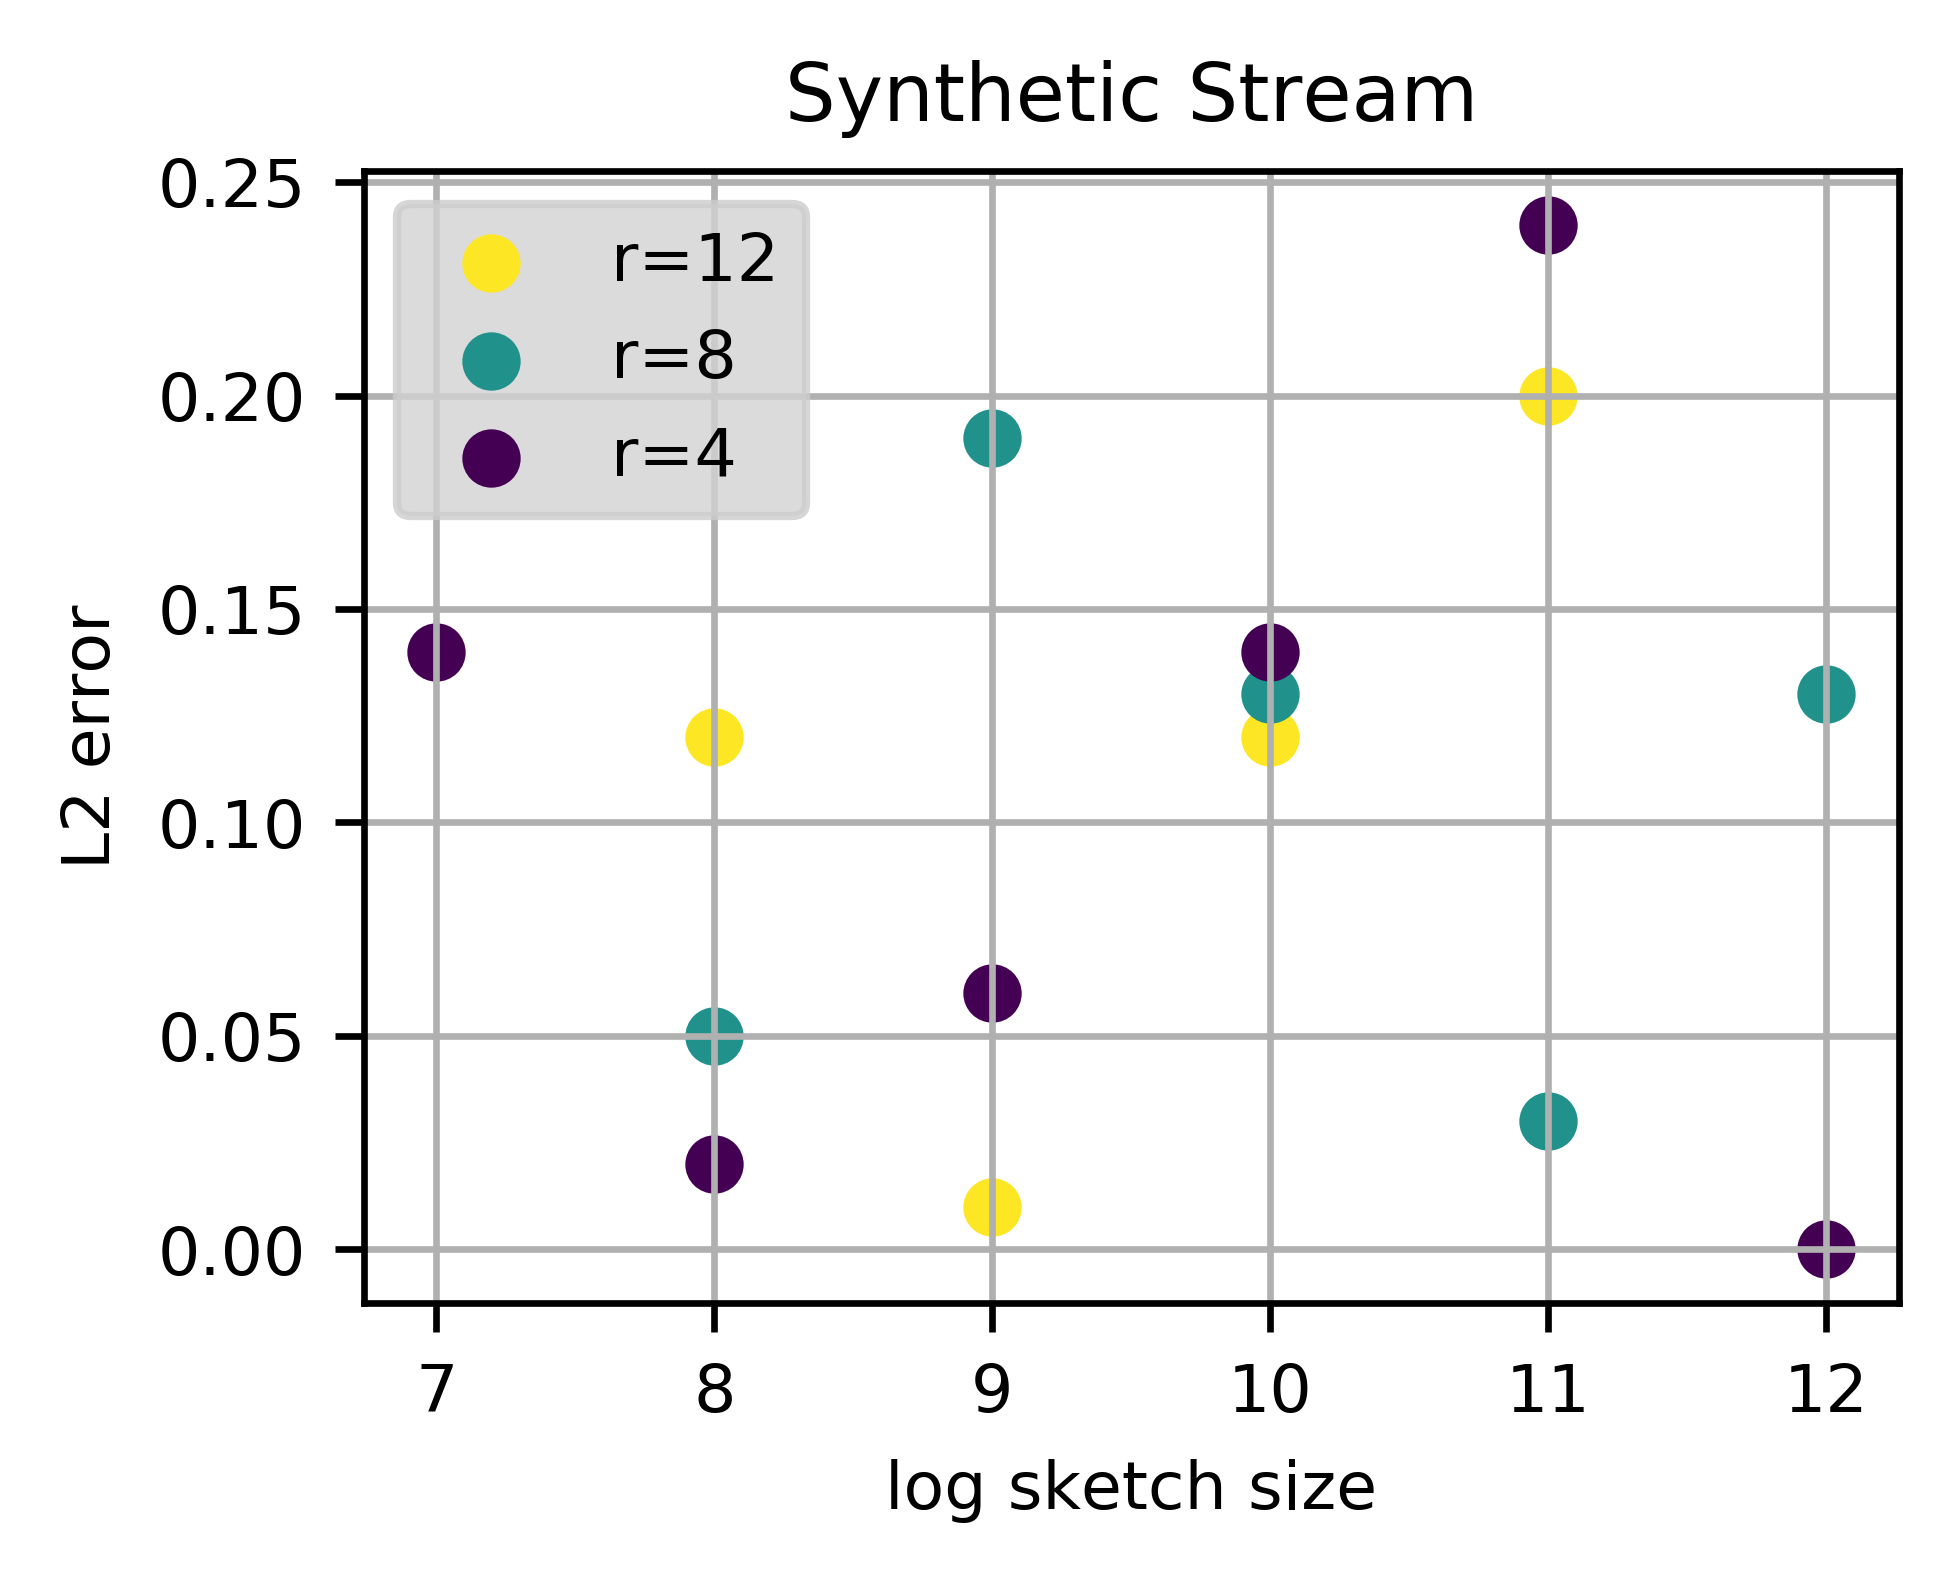

In [139]:
out2,ftr,normType = get_pd(DATADIR, FILE, mLoop=False)
plt.savefig(f'/home/swei20/SymNormSlidingWindows/imgs/{ftr}_{normType}_m.pdf')

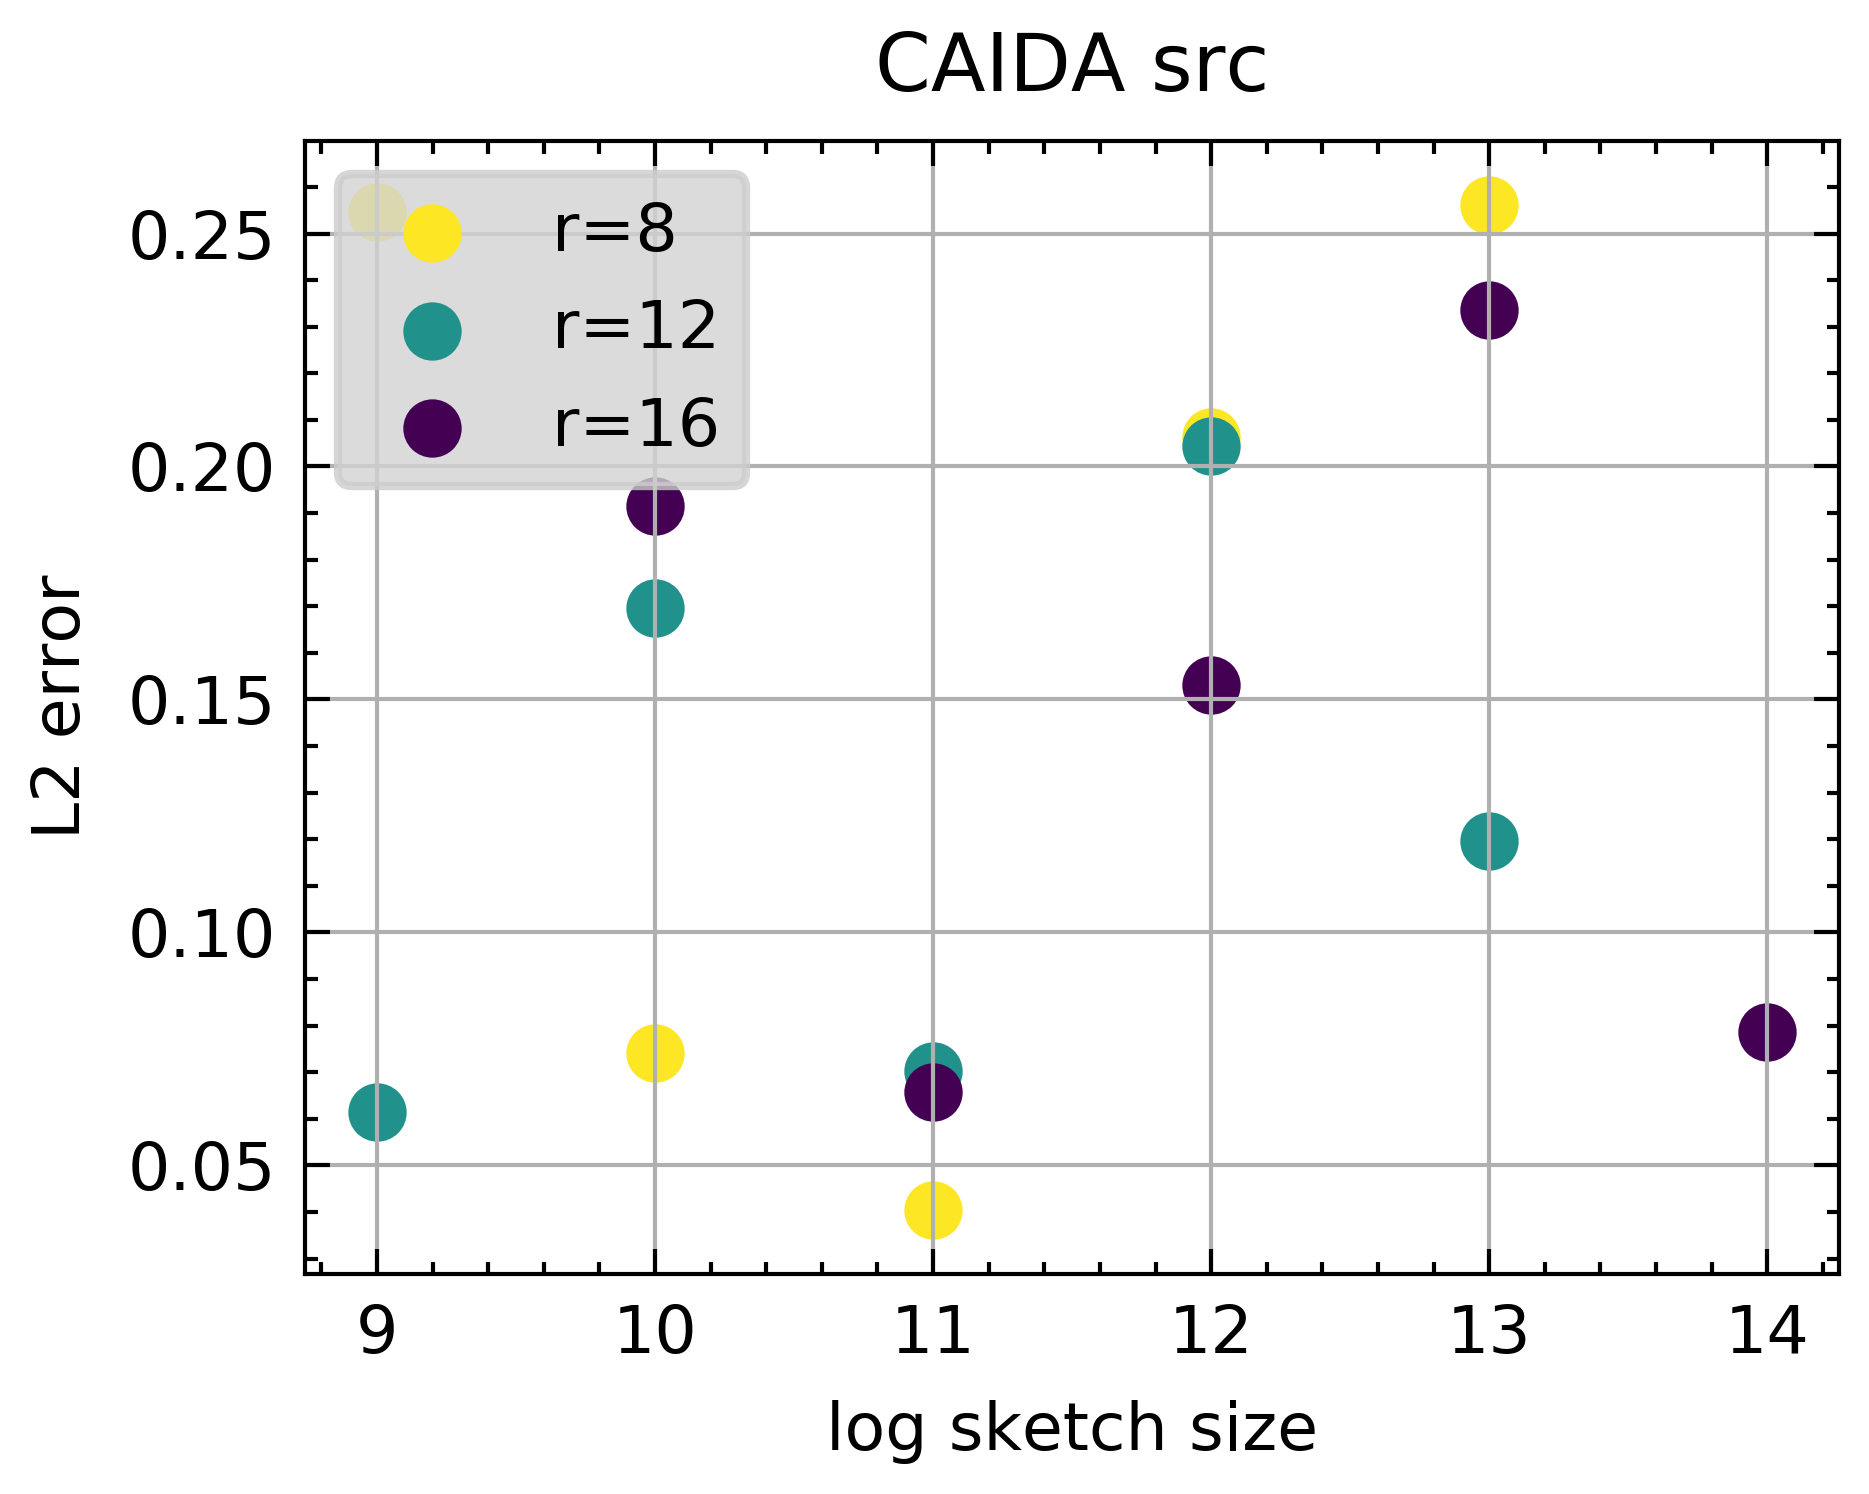

In [234]:
out3 = get_pd('trff_src__csL_m100000_1011_17:15.csv', mLoop=False)

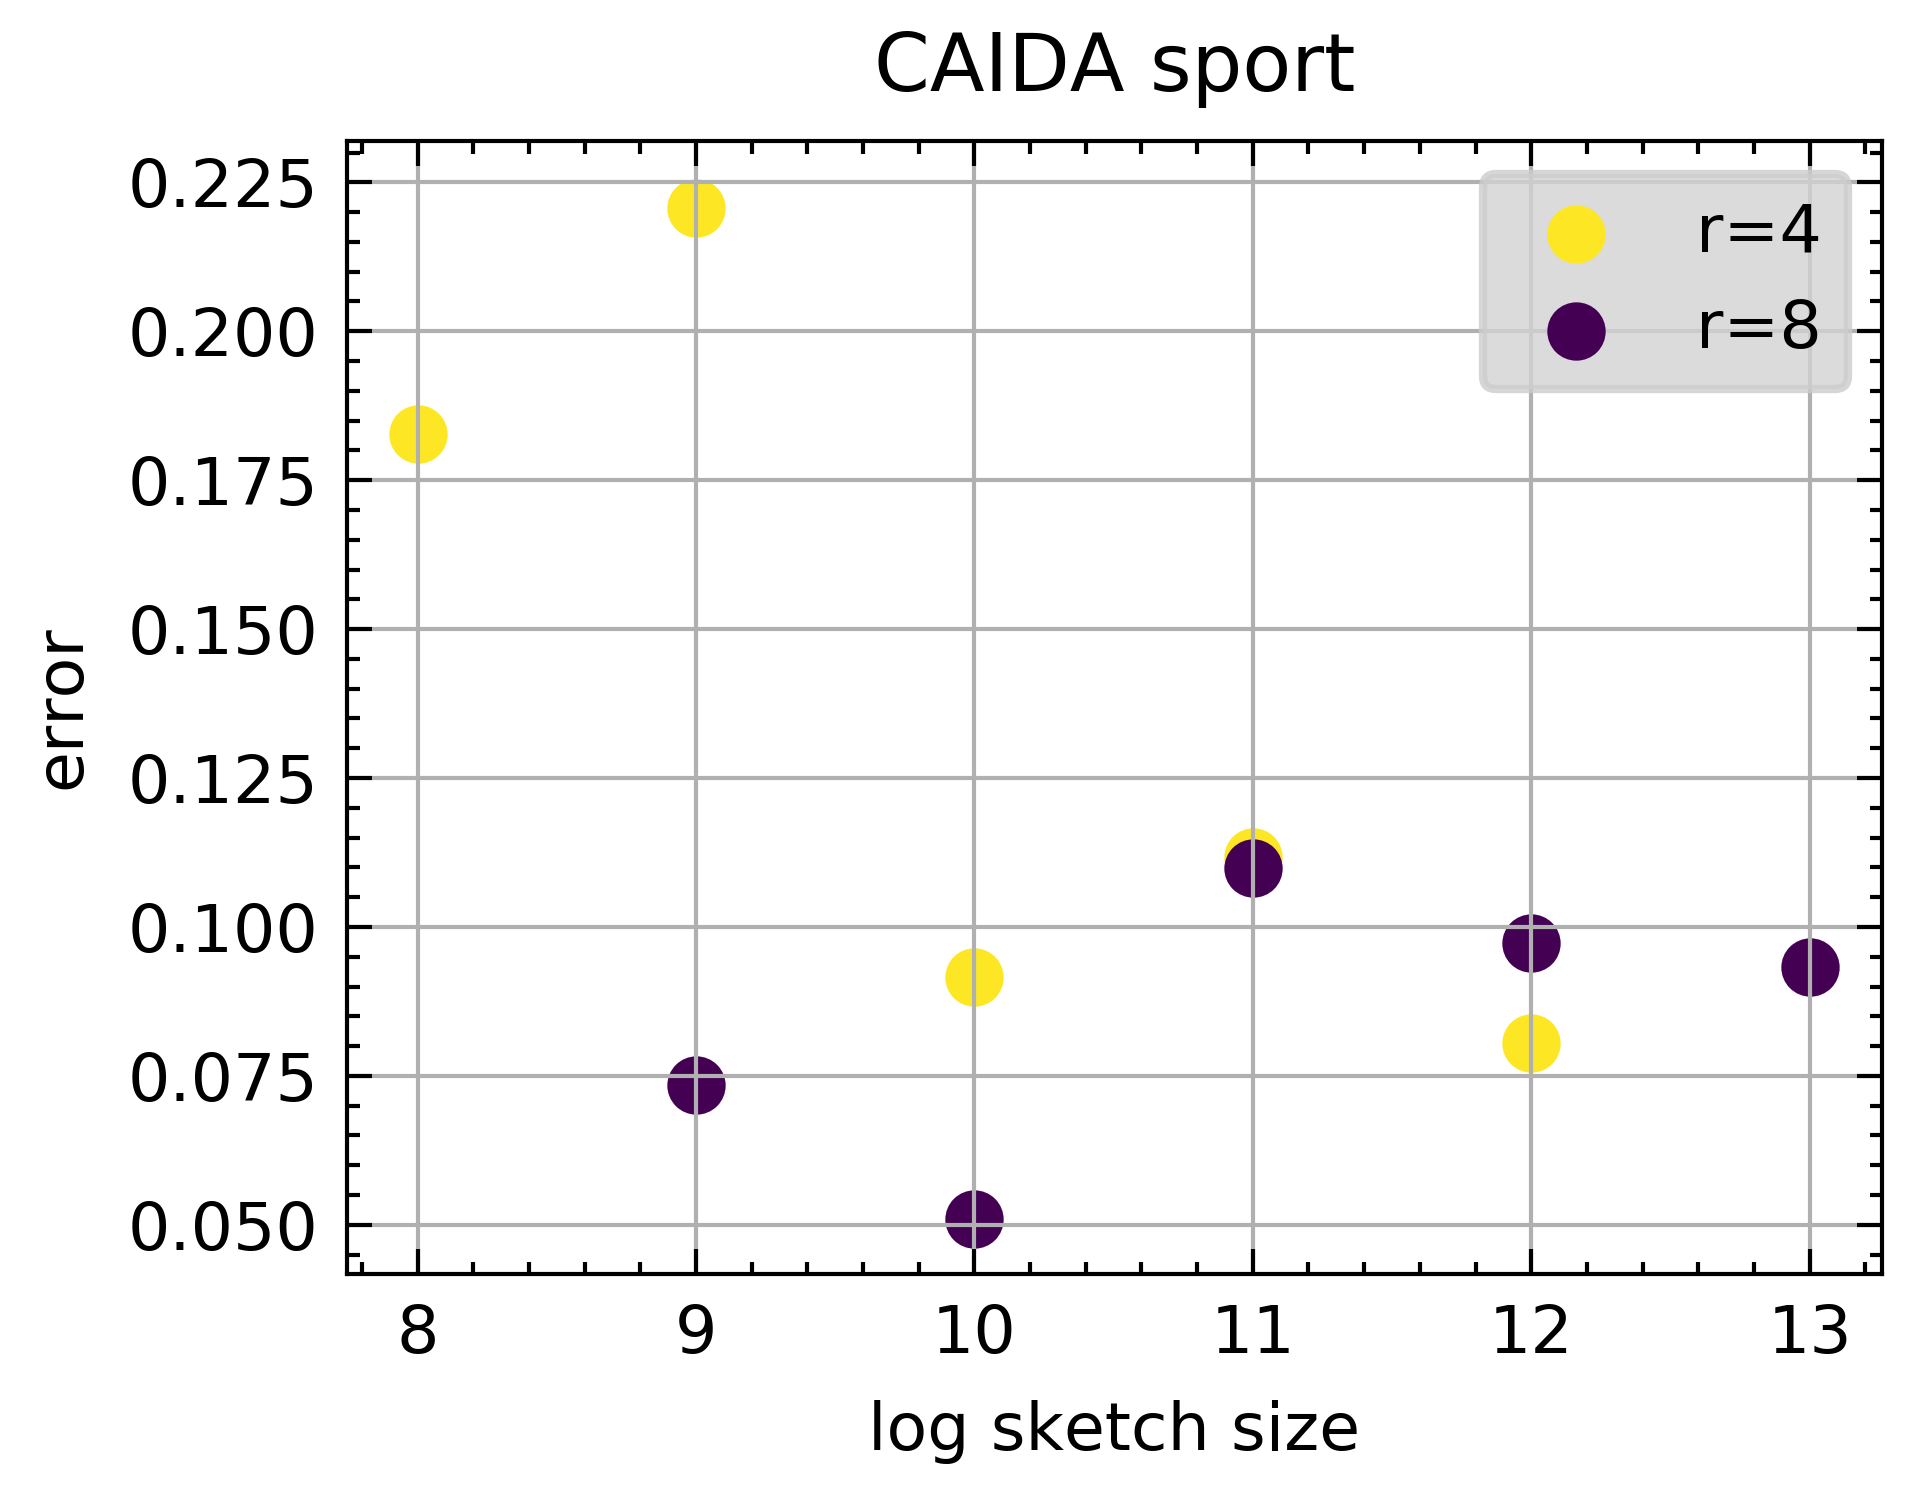

In [183]:
out3 = get_pd('trff_sport__csL_1011_01:23.csv', mLoop=False)

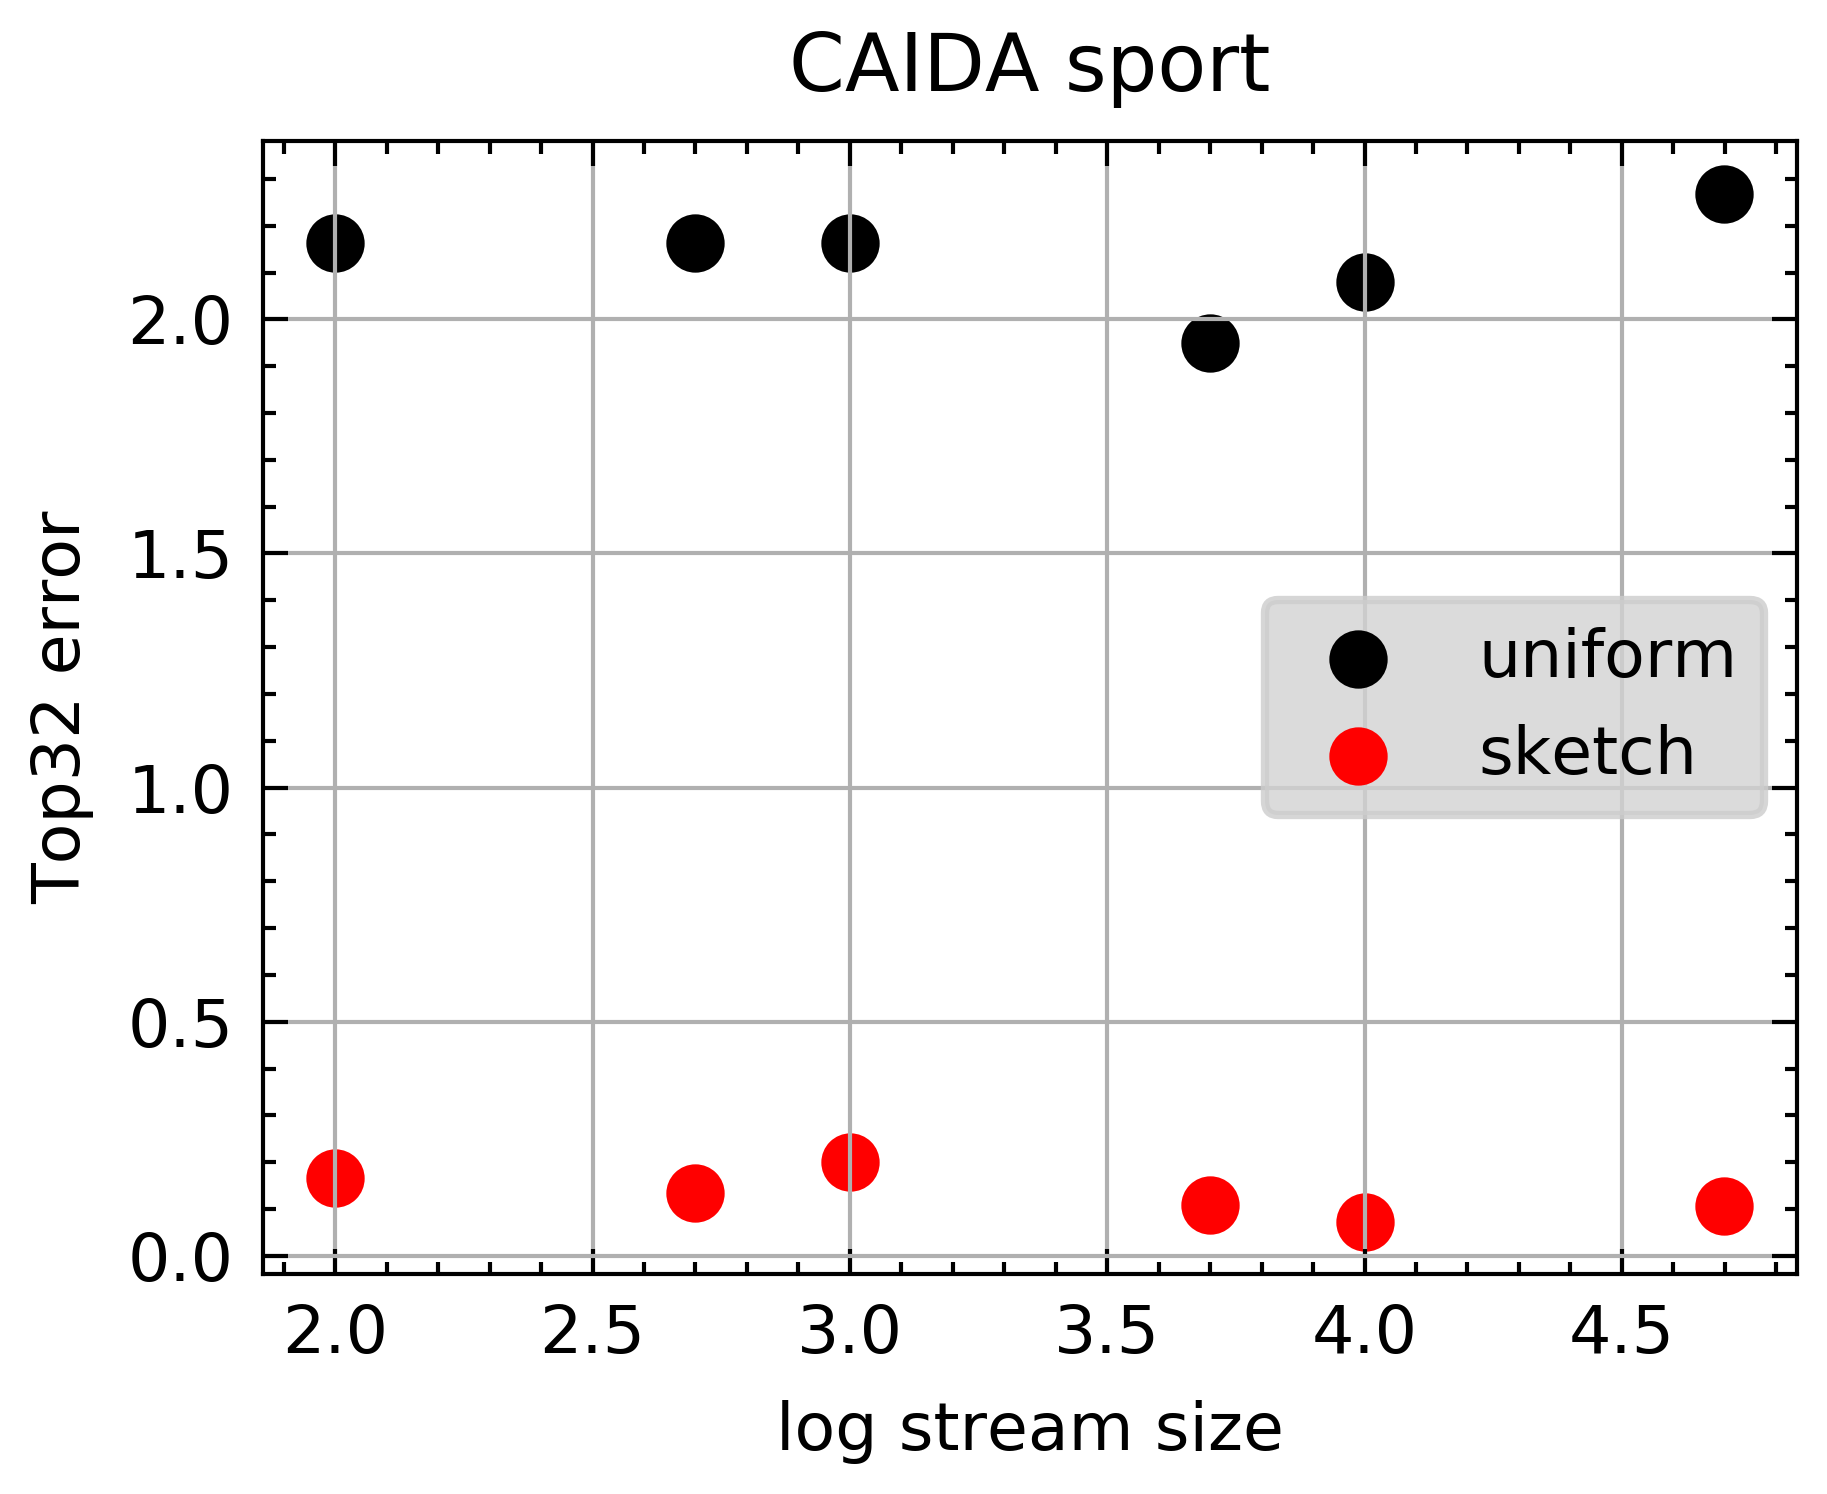

In [232]:
topK2 = get_pd('T32_sport_mL_c256_1012_02:32.csv', mLoop=True, normType='Top32')

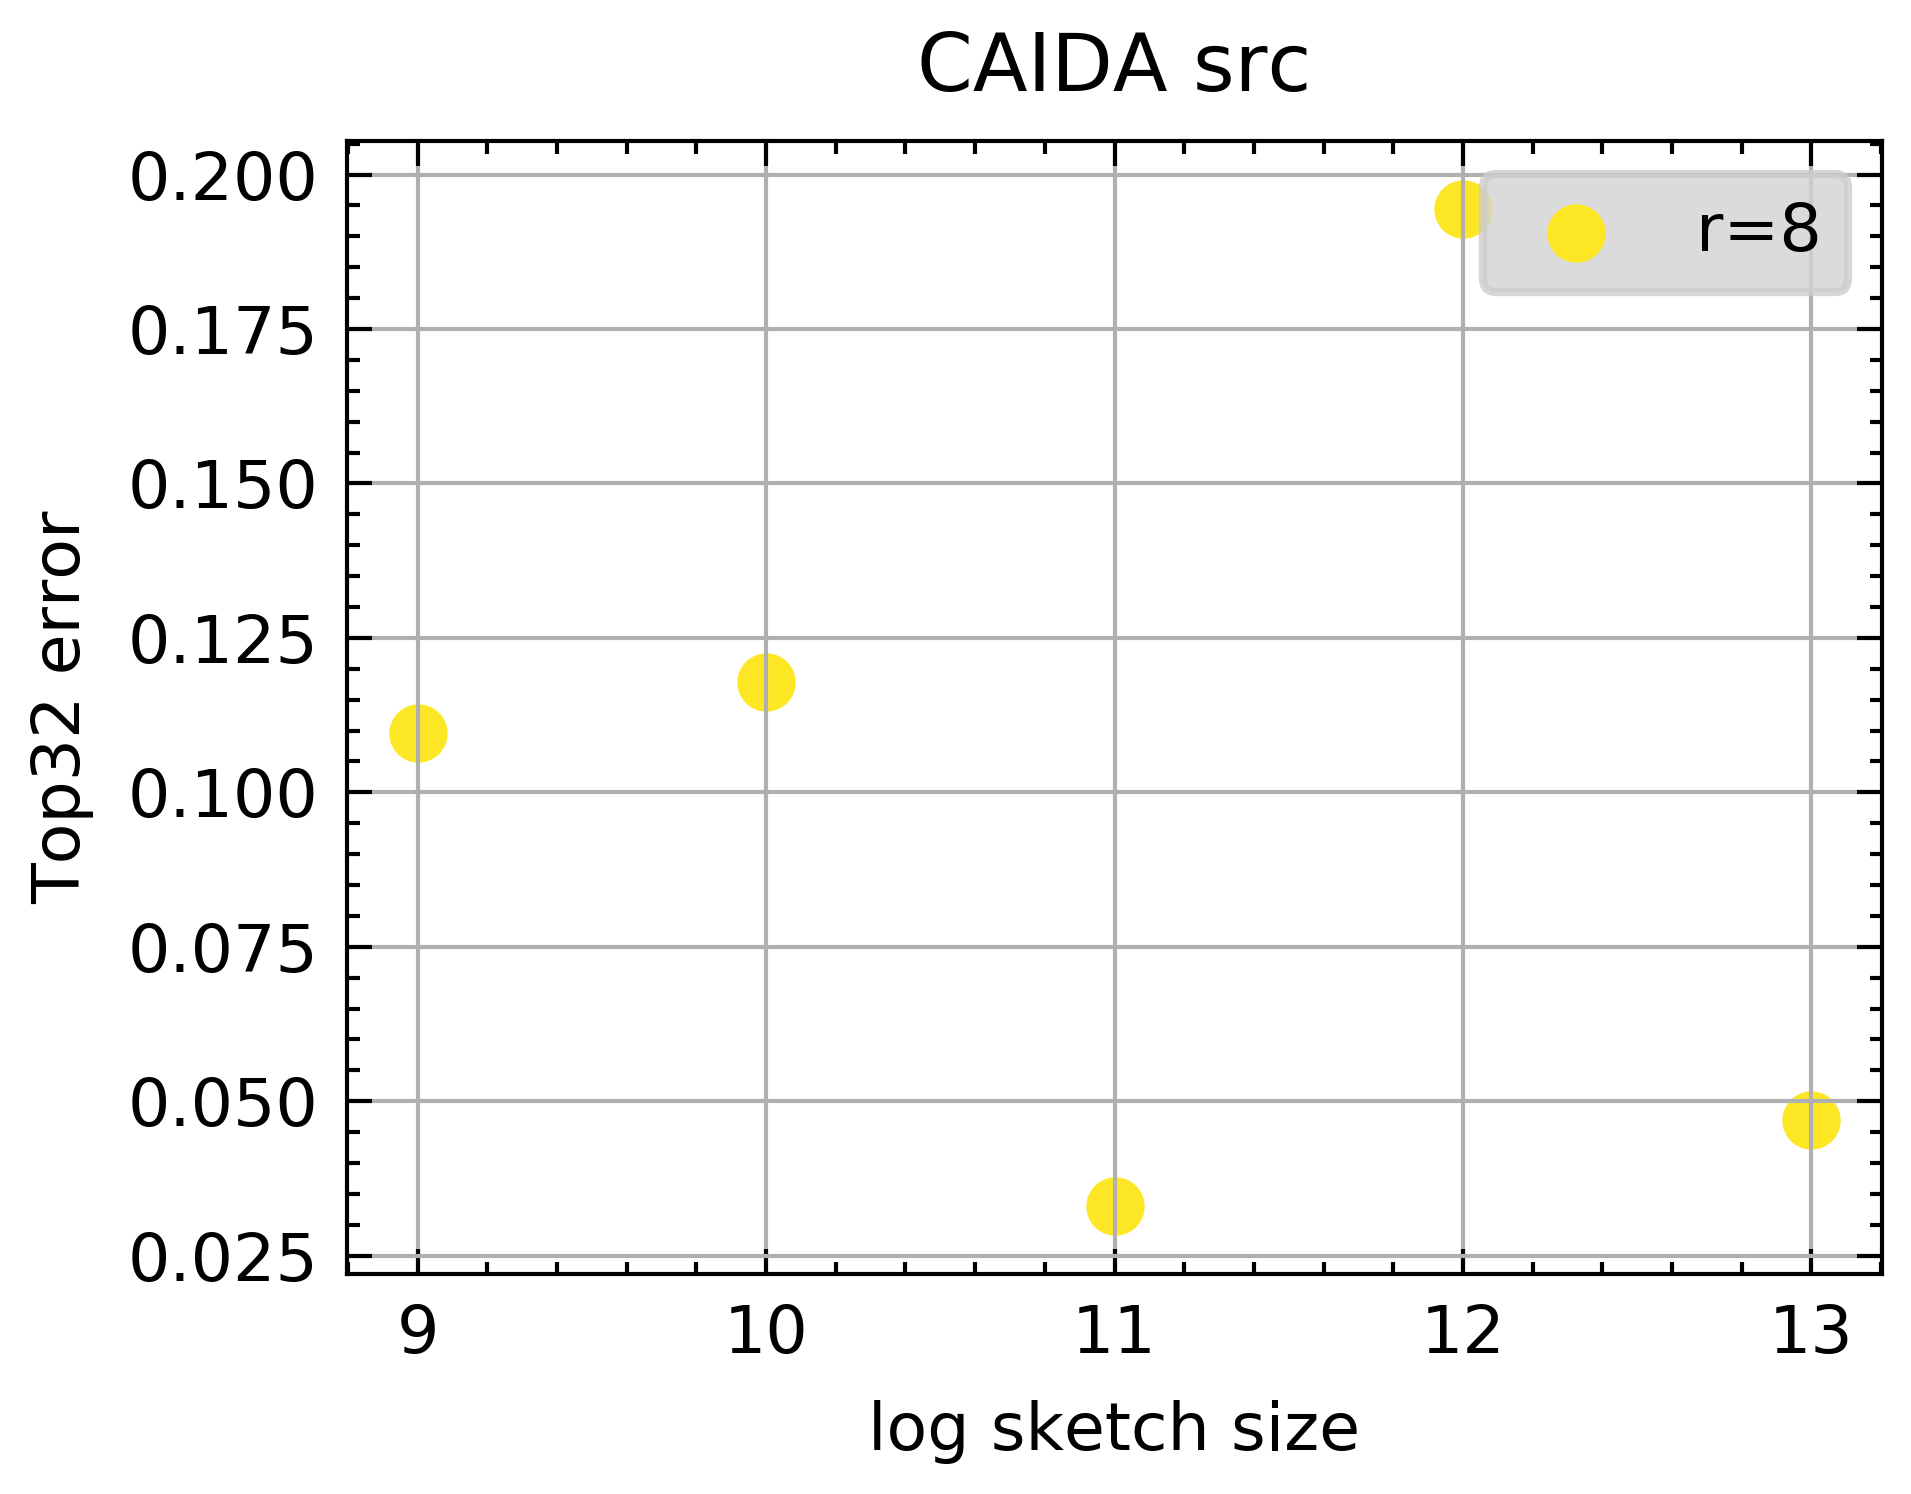

In [231]:
topK2 = get_pd('T32_src_csL_m10000_1012_02:38.csv', mLoop=False, normType='Top32')

In [12]:
aa=torch.rand((2,3))

In [108]:
P=aa[:,0]

TypeError: list indices must be integers or slices, not tuple

In [107]:
P.mean()

AttributeError: 'int' object has no attribute 'mean'

In [17]:
torch.sum(aa**2, dim=1)**(1/2.0)

tensor([0.6649, 0.3113])

In [11]:
10000//3.0

3333.0

In [21]:
16*16

256

In [92]:
def create_random_stream(n,m, rd=False):
    np.random.seed(42)
    if rd:
        return np.random.randint(4,high=n+1,size = m)
    else:
        stream = []
        d = int(np.log2(m))
        assert d < n
        for i in range(1,d+1):
            [stream.append(i) for j in range(2**(d-i))]
        l = len(stream)
        rands = np.random.randint(d+2,high=n+1,size = m-len(stream))
        stream.append(rands)
        assert len(stream) == m
        return stream

In [96]:
n,m=100,2**4
aa = create_random_stream(n,m)

In [97]:
aa

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, array([57])]

In [99]:
aaa = np.array([])

In [115]:
dd=np.append(aaa, [2.13,3.3,4.90,5.4])

In [118]:
dd.mean().round(2)

3.93

In [102]:
aaa

array([], dtype=float64)

In [20]:
64*64

4096

In [ ]:
np.factor

In [22]:
np.log2(6)

2.584962500721156

In [51]:
def get_rList(m,delta=0.05, l=3):
    rr = int(np.log(m/delta))
    rList = [rr]
    i = 0
    while i <= l:
        rrNew = int(rr/2)
        if rrNew >2:
            rList.append(rrNew)
        else:
            break
        rr = rrNew
        i+=1
    return rList

In [52]:
get_rList(10000)

[12, 6, 3]

In [45]:
m=1000
r = 6

In [48]:
np.ceil(np.log2(m/r))

8.0

In [49]:
np.floor(np.log2(m/r))

7.0

In [ ]:
def get_cList(m,r,epsilon=0.05, l=3, fac =False, gap=4):
     = np.floorp.log2(m/r))
    rList = [rr]
    i = 0
    while i <= l:
        if fac:
            rrNew = int(rr/2)
        else:
            rrNew = rr - gap
        if rrNew >2:
            rList.append(rrNew)
        else:
            break
        rr = rrNew
        i+=1
    return rList